In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import plotly.express as px

In [6]:
 import matplotlib.pyplot as plt   

In [7]:
import matplotlib

In [8]:
plt.style.use('fivethirtyeight')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
from sklearn.svm import SVR

In [14]:
df = pd.read_csv("Dataset/AirQualityUCI.csv")

In [15]:
df.head().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

In [16]:
df.sample(10).style.background_gradient(cmap='Spectral').set_properties(**{'font-family':'Segoe UI'})

In [17]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [18]:
df.isnull().sum()

Date            0
Time            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
CO_level        0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9357 non-null   object 
 1   Time          9357 non-null   object 
 2   CO_GT         9357 non-null   float64
 3   PT08_S1_CO    9357 non-null   int64  
 4   NMHC_GT       9357 non-null   int64  
 5   C6H6_GT       9357 non-null   float64
 6   PT08_S2_NMHC  9357 non-null   int64  
 7   Nox_GT        9357 non-null   int64  
 8   PT08_S3_Nox   9357 non-null   int64  
 9   NO2_GT        9357 non-null   int64  
 10  PT08_S4_NO2   9357 non-null   int64  
 11  PT08_S5_O3    9357 non-null   int64  
 12  T             9357 non-null   float64
 13  RH            9357 non-null   float64
 14  AH            9357 non-null   float64
 15  CO_level      9357 non-null   object 
dtypes: float64(5), int64(8), object(3)
memory usage: 1.1+ MB


In [21]:
df.describe().style.background_gradient(cmap='RdYlGn').set_properties(**{'font-family':'Segoe UI'})

In [22]:
CO_level_vc = df["CO_level"].value_counts()

In [23]:
CO_level_vc

CO_level
High         5801
Very low     1683
Low          1556
Moderate      305
Very High      12
Name: count, dtype: int64

In [24]:
px.bar(x=CO_level_vc.index, y=CO_level_vc.values, color=CO_level_vc.index, 
       title="CO Level wise Count", labels={'x': "CO Level", 'y': "COunt"})

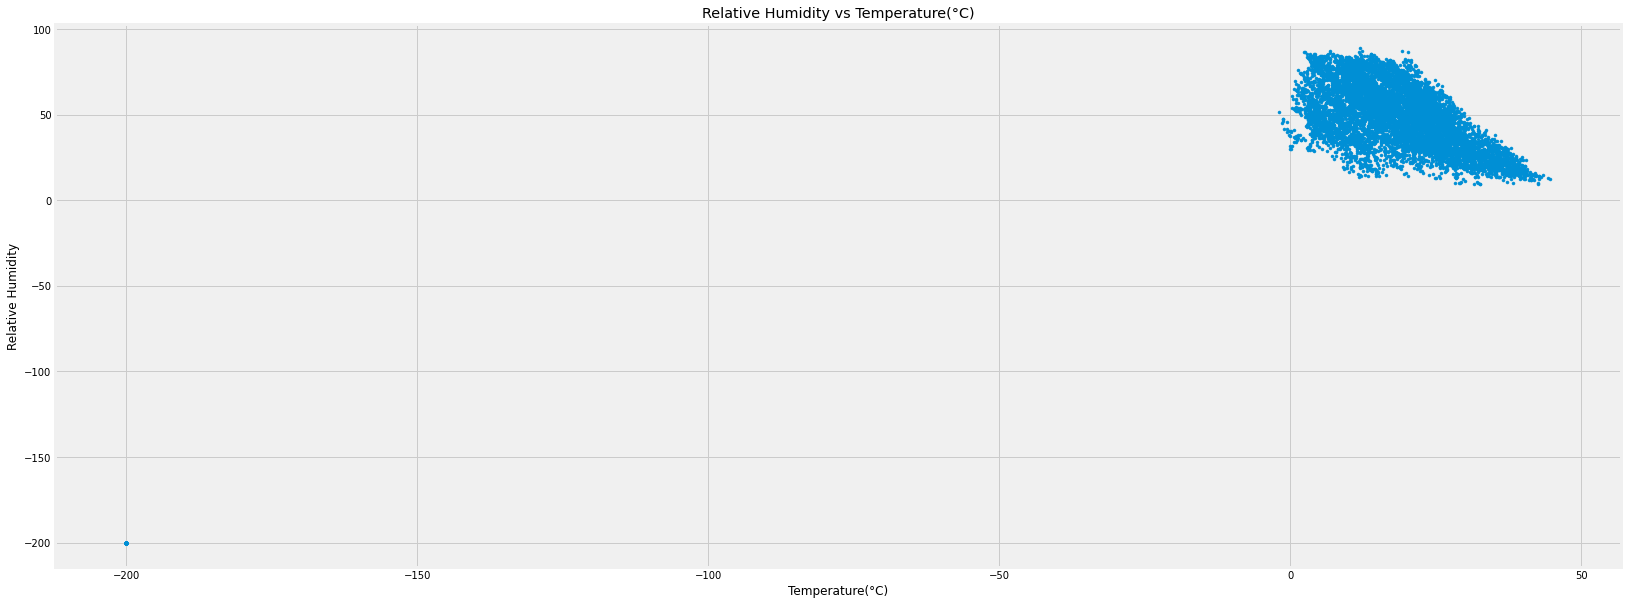

In [25]:
plt.figure(figsize=(25,10))
plt.xlabel('Temperature(°C)')
plt.ylabel('Relative Humidity')
plt.title("Relative Humidity vs Temperature(°C)")
plt.scatter(df['T'], df['RH'], marker='.', aa=True)

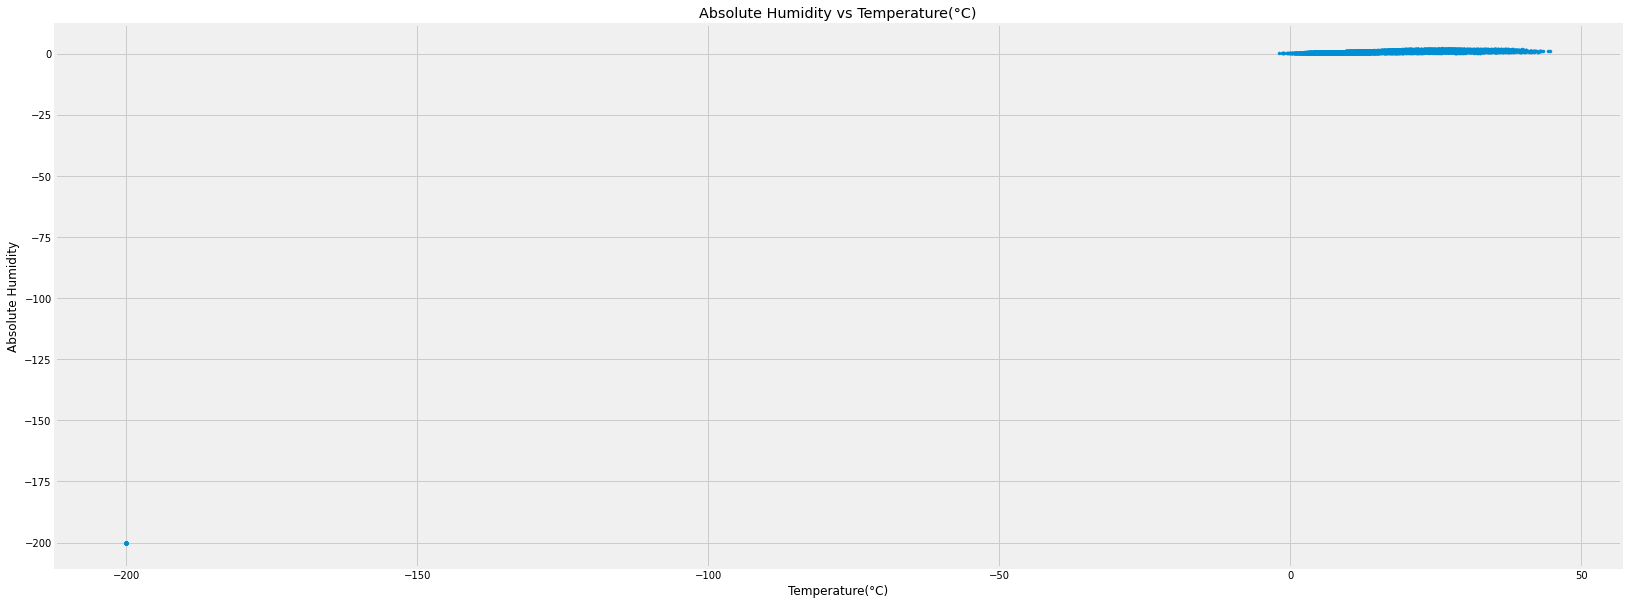

In [26]:
plt.figure(figsize=(25,10))
plt.xlabel('Temperature(°C)')
plt.ylabel('Absolute Humidity')
plt.title("Absolute Humidity vs Temperature(°C)")
plt.scatter(df['T'], df['AH'], marker='.', aa=True)

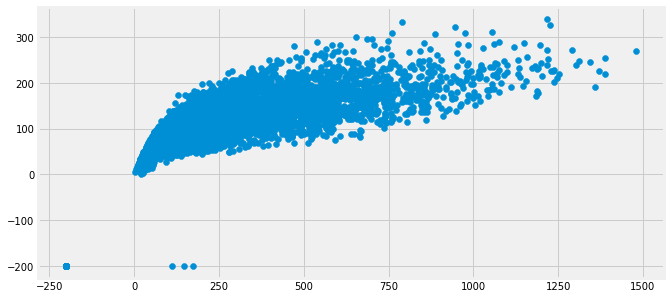

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(x=df['Nox_GT'], y=df['NO2_GT'])
plt.show()


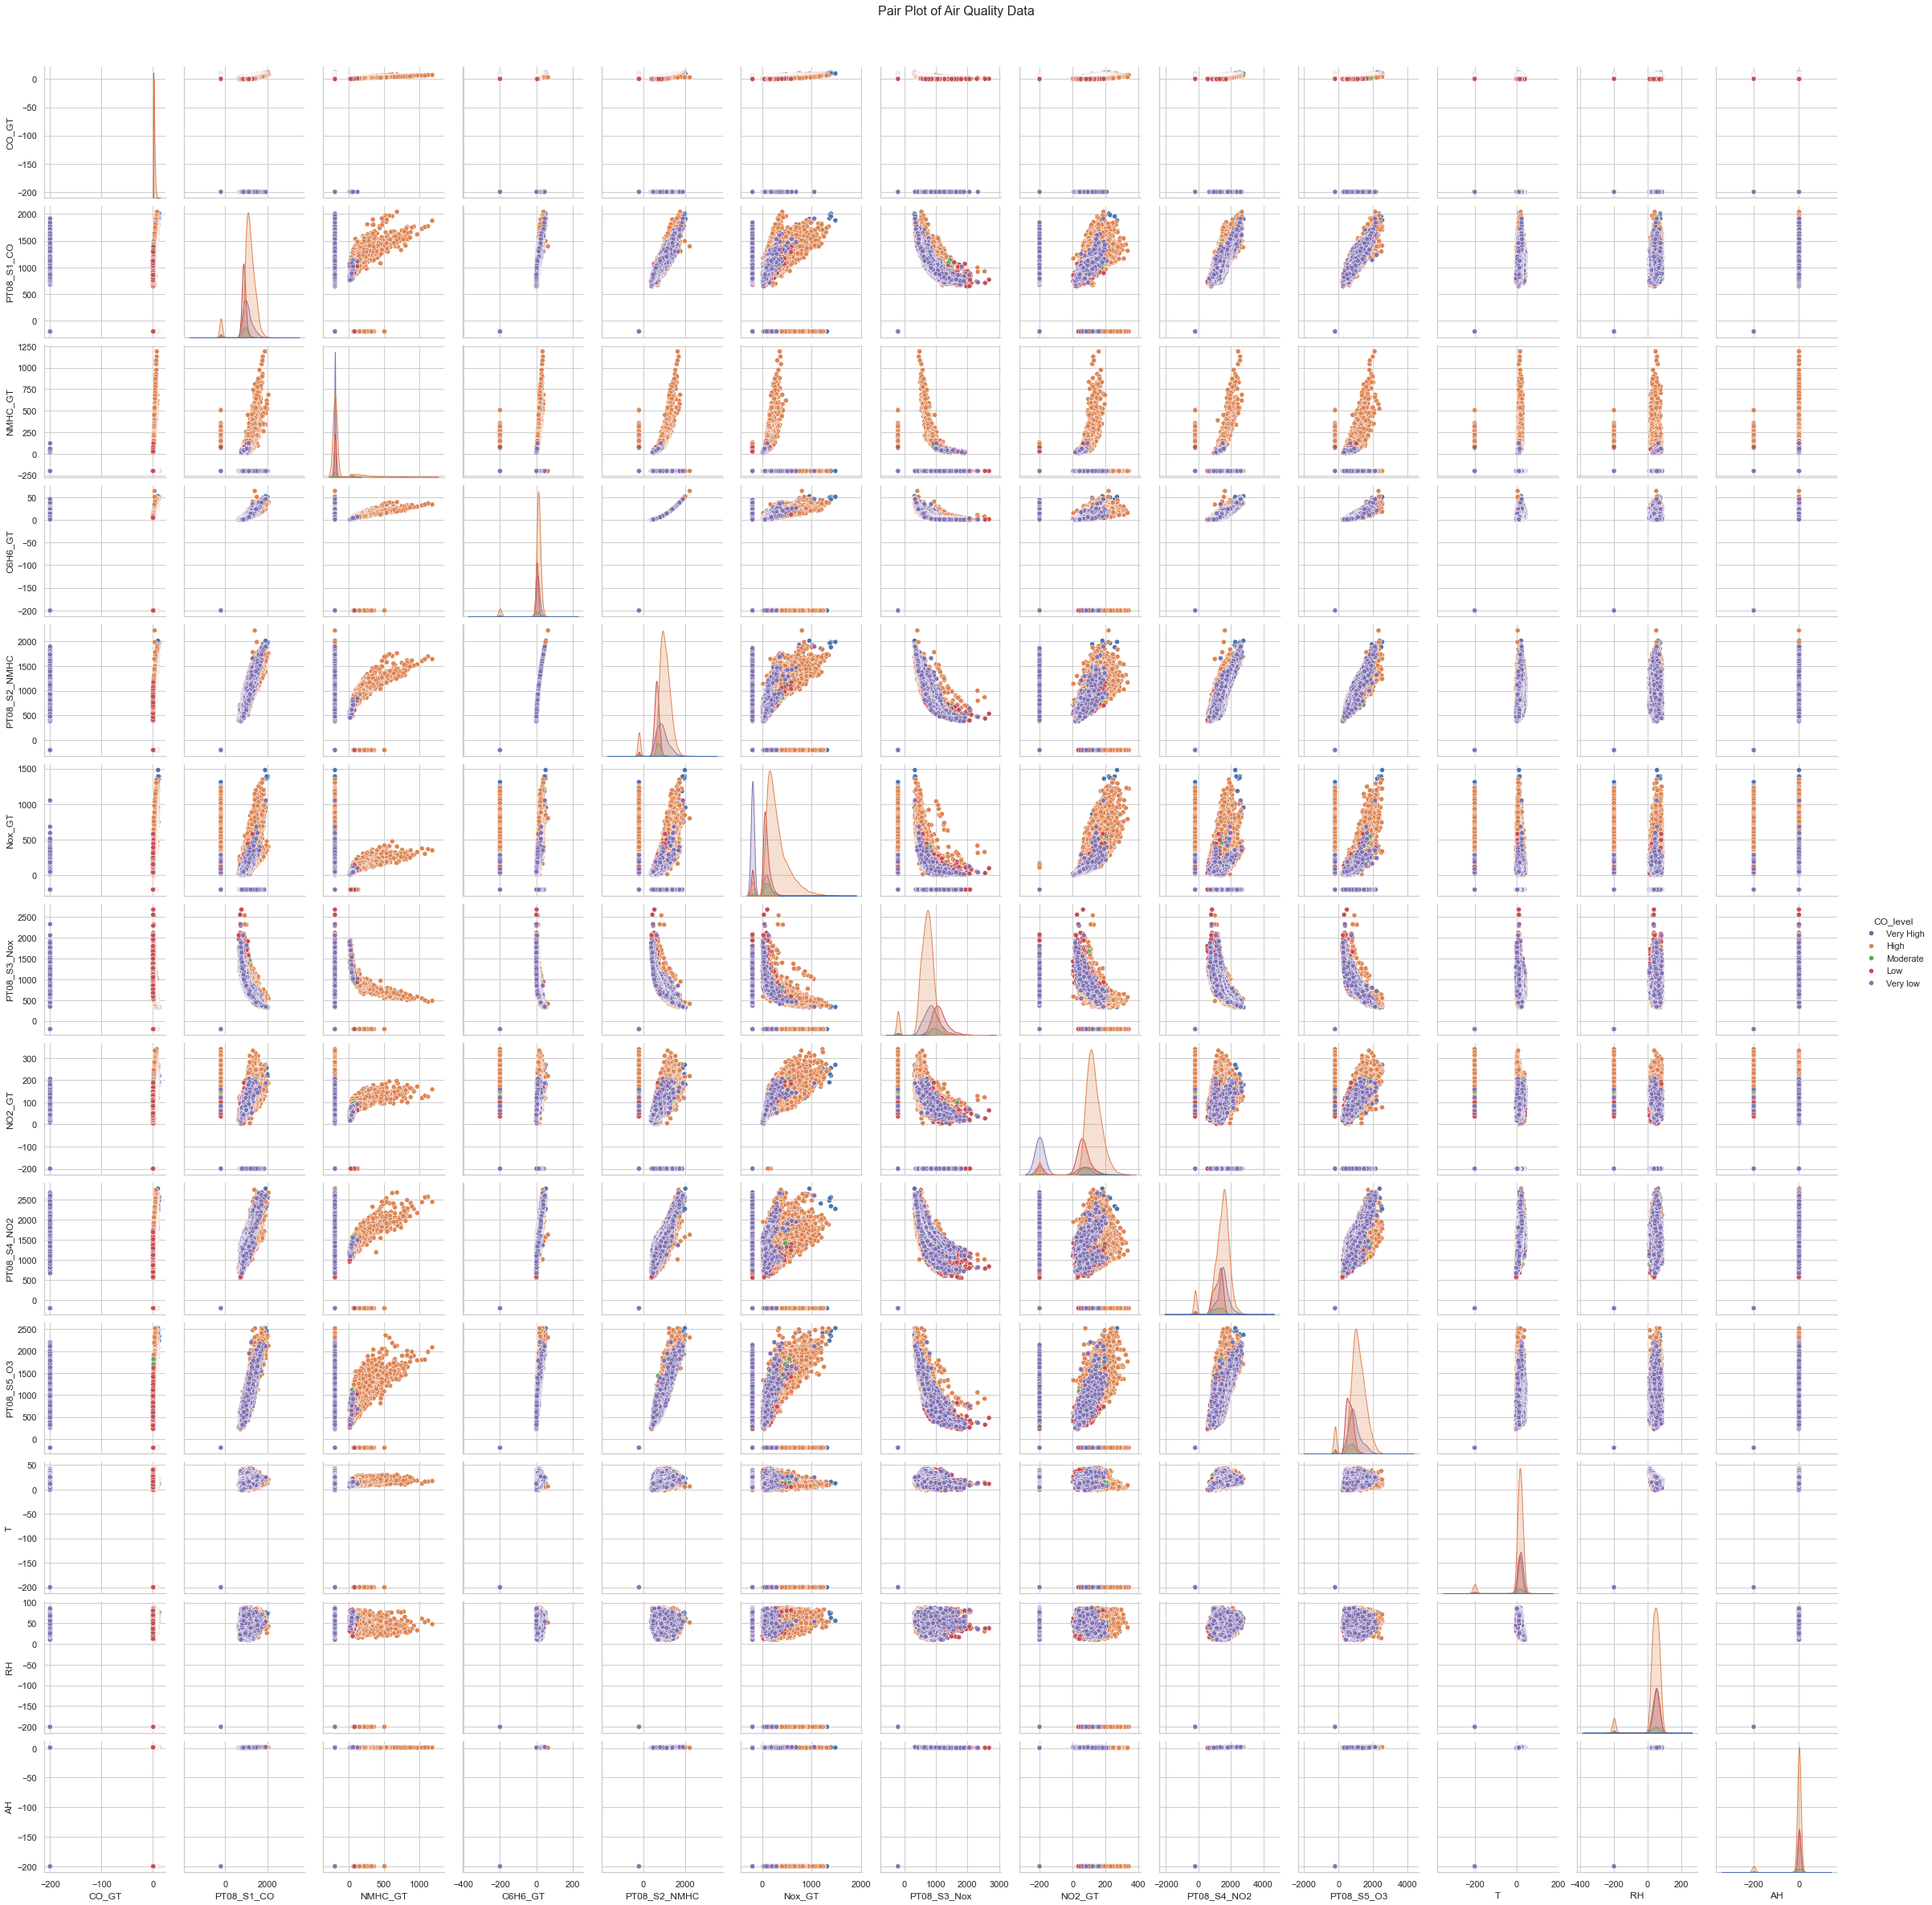

In [28]:
sns.set(style="whitegrid")
sns.pairplot(df, hue='CO_level', height=2.5)
plt.suptitle("Pair Plot of Air Quality Data", y=1.02, fontsize=16)
plt.show()

In [29]:
corr = df.corr(numeric_only=True)

<Axes: >

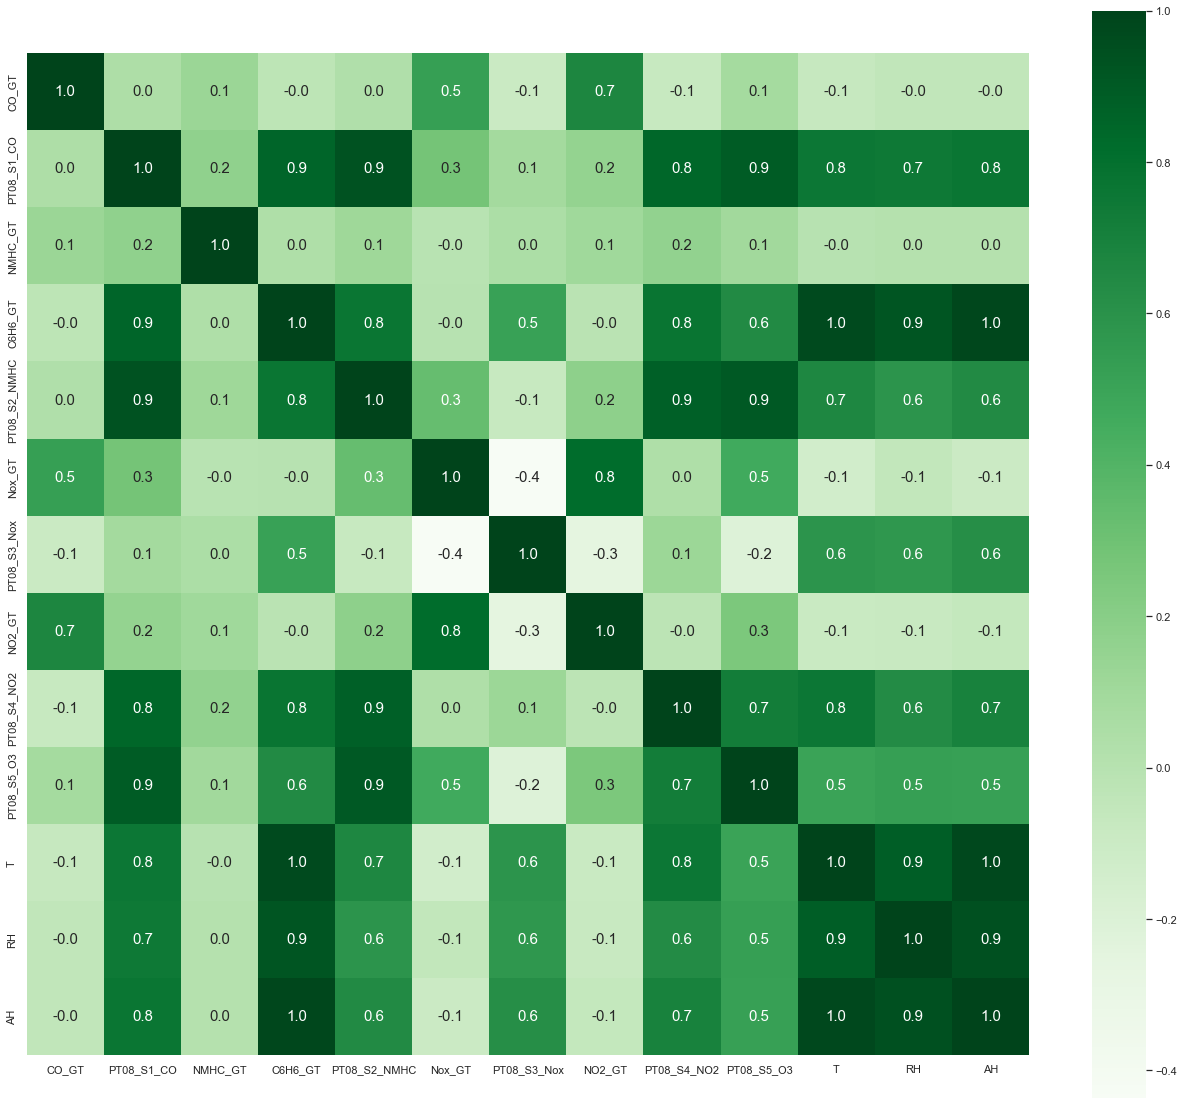

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

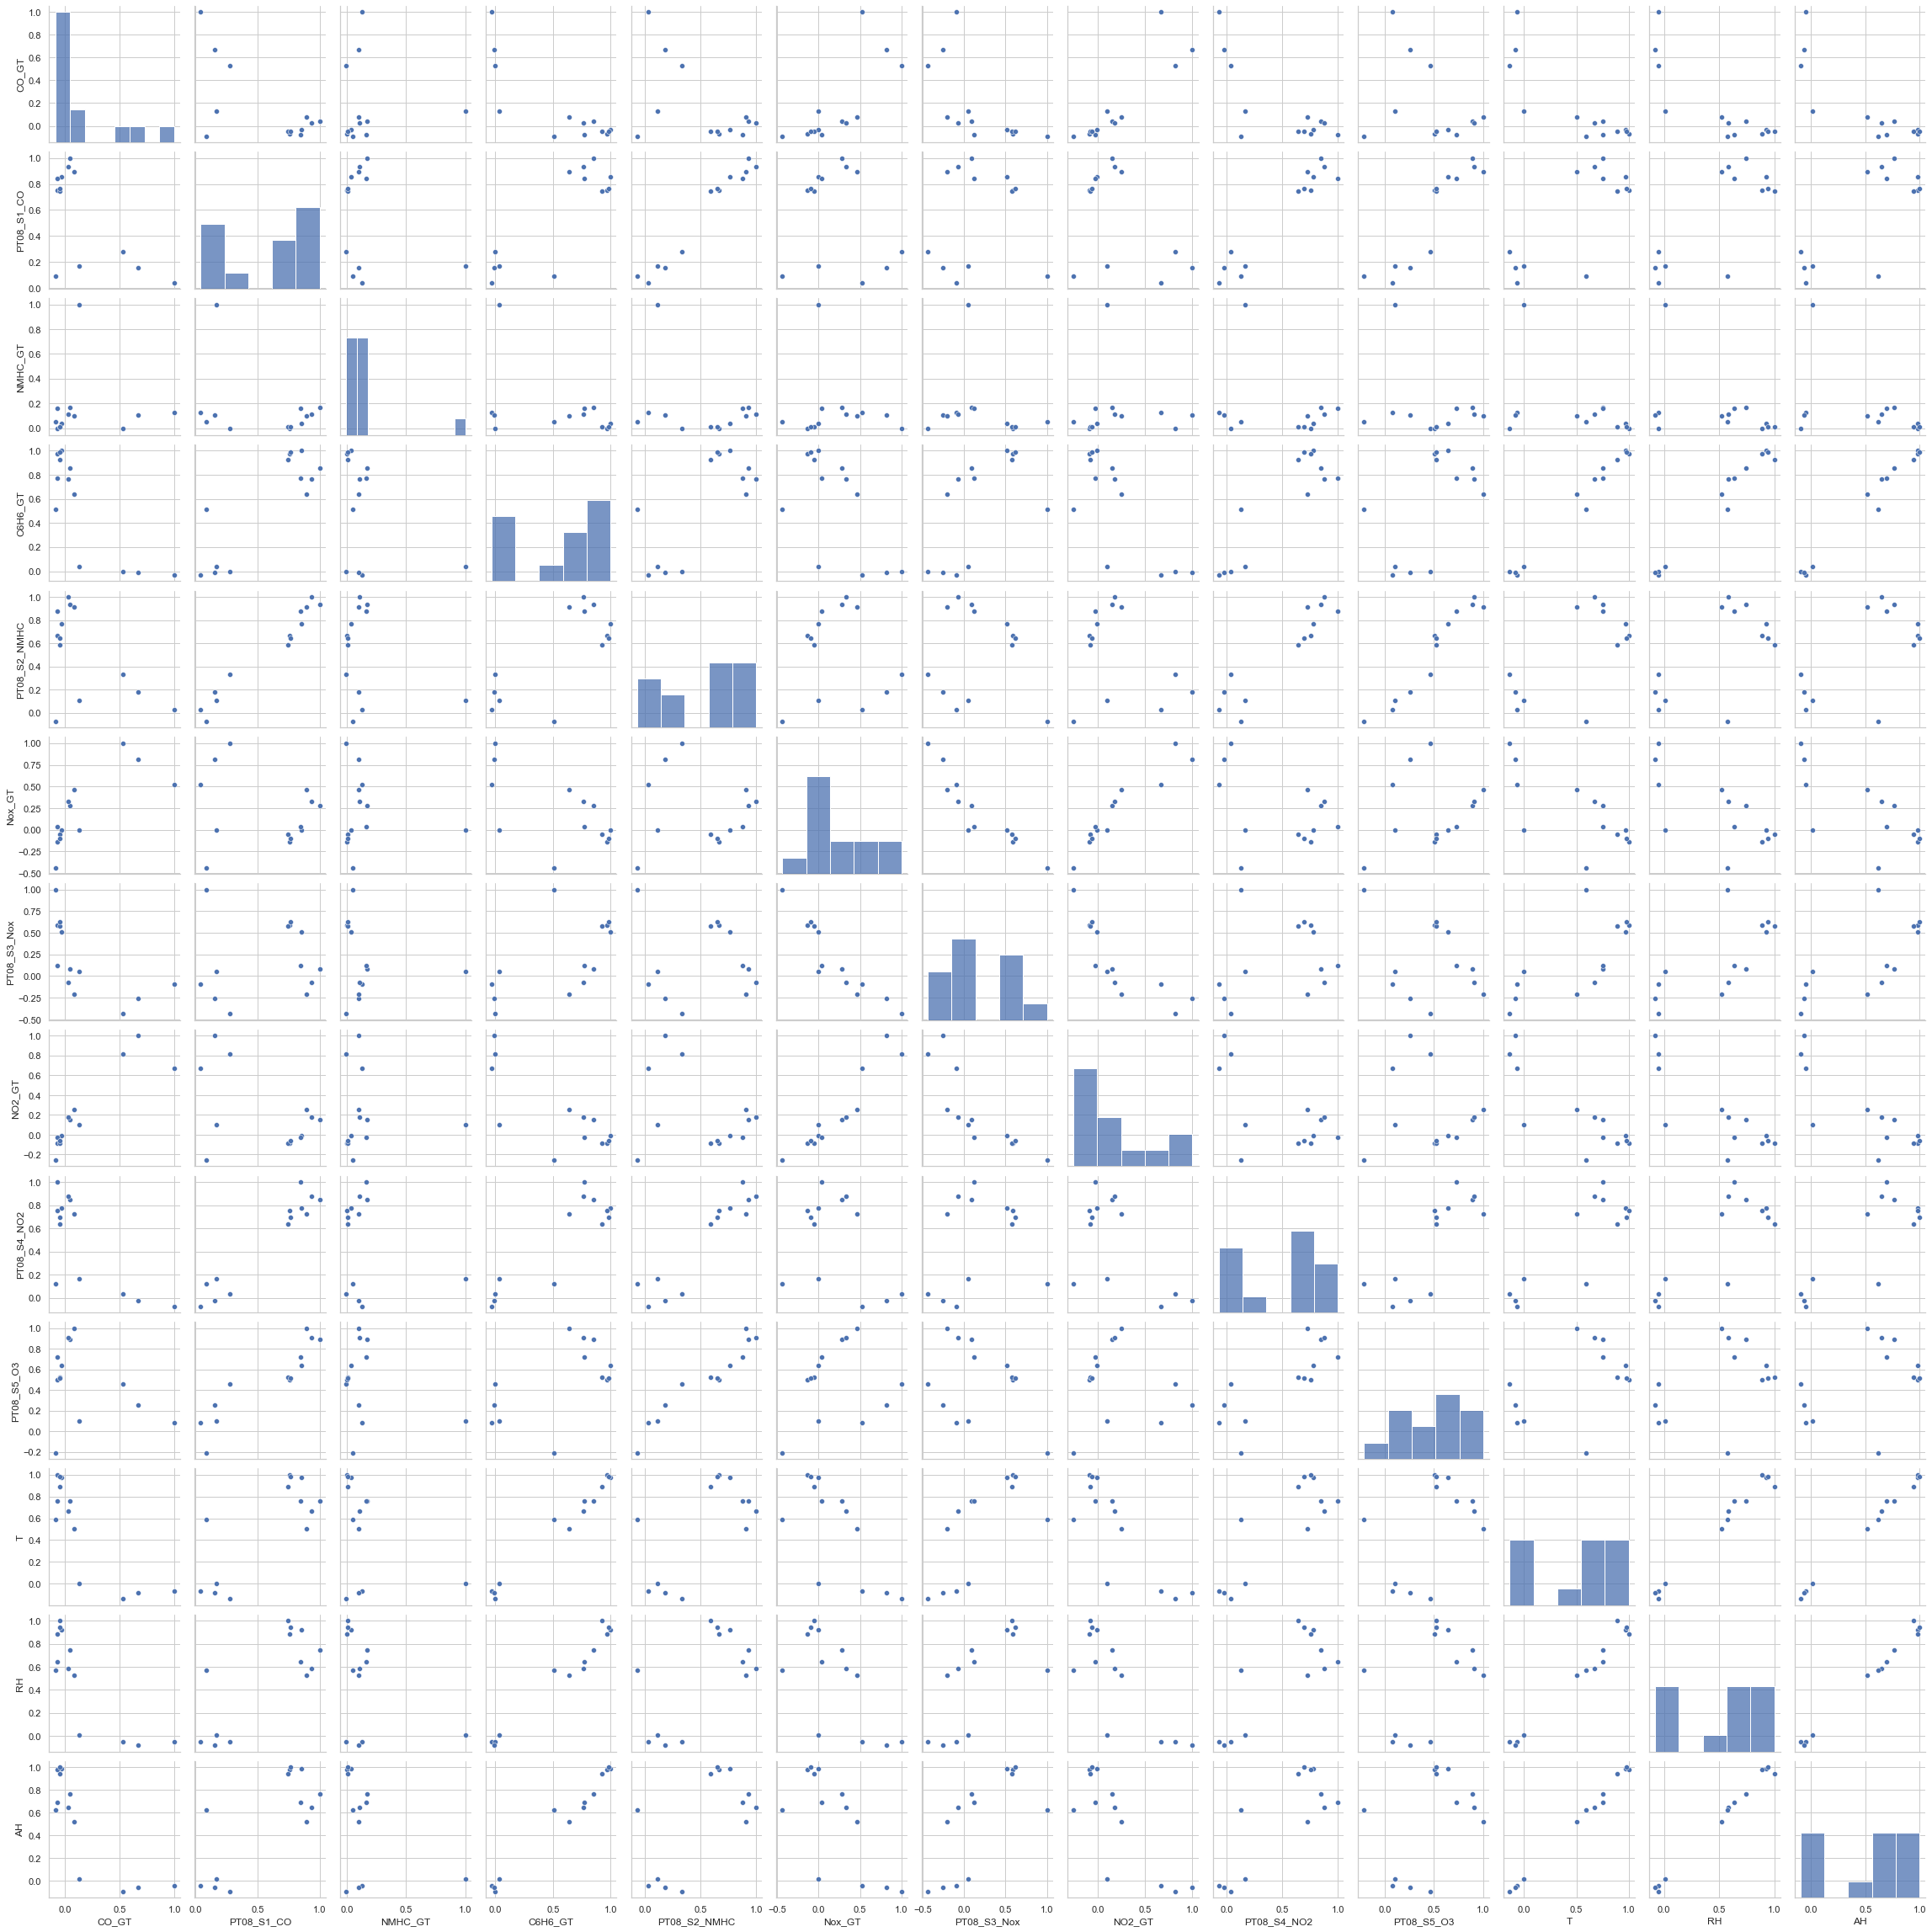

In [31]:
sns.pairplot(corr)

Text(0.5, 1.0, 'CO_GT Distribution (log price +1 )')

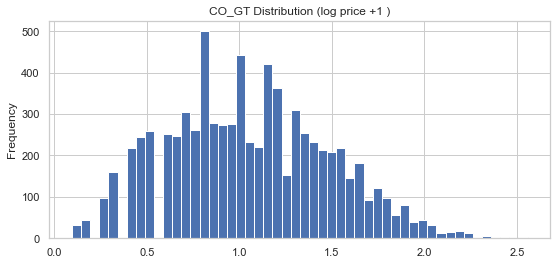

In [32]:
plt.figure(figsize=(24,12))
np.log(df['CO_GT']+1).plot.hist(bins=50, figsize=(8,4), edgecolor='white')
plt.title('CO_GT Distribution (log price +1 )')

In [33]:
X = df.drop(['Date','Time','RH', 'CO_level'],axis=1)

In [34]:
y = df['RH']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
for i in range(30,610,10):
    reg=RandomForestRegressor(n_estimators=i,max_depth=5,max_features='sqrt',oob_score=True,random_state=200)
    reg.fit(X_train,y_train)
    oob=reg.oob_score_
    print('For n_estimators = '+str(i))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 30
OOB score is 0.9514367007550155
************************
For n_estimators = 40
OOB score is 0.9515122436339587
************************
For n_estimators = 50
OOB score is 0.9520059913882601
************************
For n_estimators = 60
OOB score is 0.9524311495549005
************************
For n_estimators = 70
OOB score is 0.9529598627191795
************************
For n_estimators = 80
OOB score is 0.953685854962916
************************
For n_estimators = 90
OOB score is 0.9542054022006369
************************
For n_estimators = 100
OOB score is 0.9542386008790458
************************
For n_estimators = 110
OOB score is 0.954336269400633
************************
For n_estimators = 120
OOB score is 0.9541127482877342
************************
For n_estimators = 130
OOB score is 0.9545253697014145
************************
For n_estimators = 140
OOB score is 0.9547485515113806
************************
For n_estimators = 150
OOB score is 0.95476085334

In [37]:
reg.score(X_test,y_test)

0.9521300801015257

In [38]:
reg.oob_score_

0.9547473657843478

In [39]:
reg.feature_importances_

array([0.00031233, 0.12550538, 0.0001874 , 0.12512398, 0.12684798,
       0.00204454, 0.08809165, 0.00152705, 0.12546127, 0.1242936 ,
       0.14336043, 0.13724438])

In [40]:
imp_feat=pd.Series(reg.feature_importances_,index=X.columns.tolist())

In [41]:
imp_feat.sort_values(ascending=False)

T               0.143360
AH              0.137244
PT08_S2_NMHC    0.126848
PT08_S1_CO      0.125505
PT08_S4_NO2     0.125461
C6H6_GT         0.125124
PT08_S5_O3      0.124294
PT08_S3_Nox     0.088092
Nox_GT          0.002045
NO2_GT          0.001527
CO_GT           0.000312
NMHC_GT         0.000187
dtype: float64

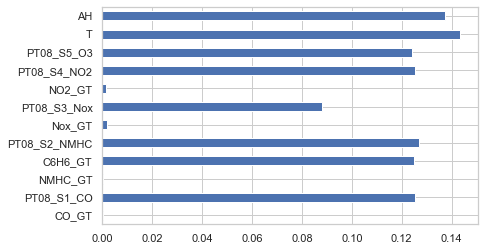

In [42]:
feature_importances = pd.Series(reg.feature_importances_, index=X.columns)
feature_importances.plot(kind='barh')
plt.show()

In [43]:
y_pred = reg.predict(X_test)

In [44]:
def evaluate_metrics(y_test, prediction):
    print('MAE:', mean_absolute_error(y_test, prediction))
    print('MSE:', mean_squared_error(y_test, prediction))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
    print('r1-Score:', r2_score(y_test, prediction))

In [45]:
evaluate_metrics(y_test, y_pred)

MAE: 8.874756142853464
MSE: 124.87683207393353
RMSE: 11.174830292847114
r1-Score: 0.9521300801015257


In [46]:
reg_results = pd.DataFrame(zip(y_test, y_pred, y_test - y_pred), columns = ['y_test', 'y_pred', 'error'])
reg_results.head(10)

y_test      y_pred      error
0    47.6   49.656915  -2.056915
1    63.1   52.034771  11.065229
2    28.8   40.388702 -11.588702
3    53.4   46.847695   6.552305
4    37.6   41.313889  -3.713889
5    83.5   59.284637  24.215363
6    57.7   58.468269  -0.768269
7    37.9   43.727749  -5.827749
8    38.9   44.341131  -5.441131
9  -200.0 -200.000000   0.000000

<Axes: >

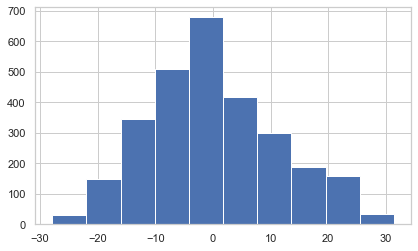

In [47]:
reg_results['error'].hist()

<Axes: xlabel='error', ylabel='Density'>

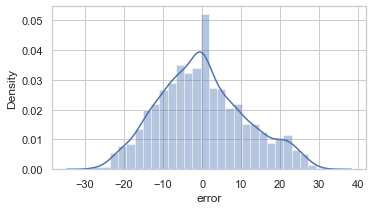

In [48]:
plt.figure(figsize=(5,3))
sns.distplot(reg_results['error'])

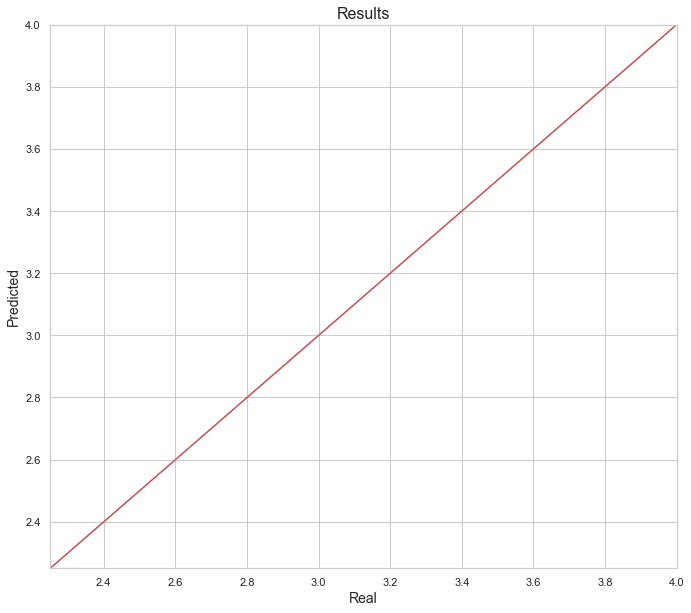

In [49]:
plt.figure(figsize=(10,10))
x=np.linspace(0,5,5)
plt.plot(reg_results['y_test'], reg_results['y_pred'], 'b.')
plt.plot(x, x, 'r-')
plt.xlim(2.25,4)
plt.ylim(2.25,4)
plt.title("Results", fontsize=16)
plt.xlabel("Real", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.savefig("Results.png")
plt.show()

In [50]:
svr = SVR()

In [51]:
svr.fit(X_train,y_train)

SVR()

In [52]:
svr.score(X_test,y_test)

0.9208995571640648

In [53]:
y_pred = svr.predict(X_test)

In [54]:
evaluate_metrics(y_test, y_pred)

MAE: 11.648411783821926
MSE: 206.34696565079676
RMSE: 14.364782130293406
r1-Score: 0.9208995571640648


In [55]:
svr_results = pd.DataFrame(zip(y_test, y_pred, y_test - y_pred), columns = ['y_test', 'y_pred', 'error'])
svr_results.head(10)

y_test      y_pred      error
0    47.6   50.487368  -2.887368
1    63.1   48.576385  14.523615
2    28.8   44.997330 -16.197330
3    53.4   43.863265   9.536735
4    37.6   44.507328  -6.907328
5    83.5   54.289335  29.210665
6    57.7   58.142117  -0.442117
7    37.9   45.552648  -7.652648
8    38.9   32.730180   6.169820
9  -200.0 -183.872746 -16.127254

In [56]:
X_test

CO_GT  PT08_S1_CO  NMHC_GT  C6H6_GT  PT08_S2_NMHC  Nox_GT  PT08_S3_Nox  \
9232 -200.0         882     -200      3.1           660    -200          991   
585     4.4        1587      202     17.9          1236     307          897   
356     5.0        1424     -200     27.3          1486     506          523   
3873    1.8        1063     -200     10.4           991     200          655   
3916    1.8         962     -200      7.5           877     413          841   
...     ...         ...      ...      ...           ...     ...          ...   
3609    1.9         922     -200     11.8          1042     152          887   
8313 -200.0        1115     -200     12.1          1053     158          686   
3266    2.1        1107     -200      8.1           905     263          705   
1599    3.1        1430      221     14.1          1120     201          831   
5567    1.1        1054       86      5.3           779     111         1080   

      NO2_GT  PT08_S4_NO2  PT08_S5_O3     T      AH  
9232    -200          922         727   8.0  0.5113  
585      141         1900        1400   7.3  0.6499  
356      218         2084        1537  32.2  1.3624  
3873     104         1672         966  24.4  1.6031  
3916     120          969         949   9.3  0.4391  
...      ...          ...         ...   ...     ...  
3609     132         1744         832  31.3  1.0816  
8313     141         1722        1086  34.8  1.4241  
3266     116         1288         966  12.9  0.9258  
1599     134         1783        1522  22.0  0.8904  
5567      98         1266        1013  11.3  0.5376  

[2808 rows x 12 columns]

<Axes: >

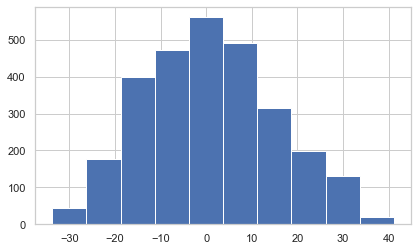

In [57]:
svr_results['error'].hist()

<Axes: xlabel='error', ylabel='Density'>

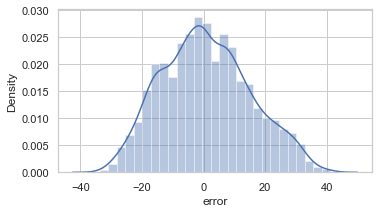

In [58]:
plt.figure(figsize=(5,3))
sns.distplot(svr_results['error'])

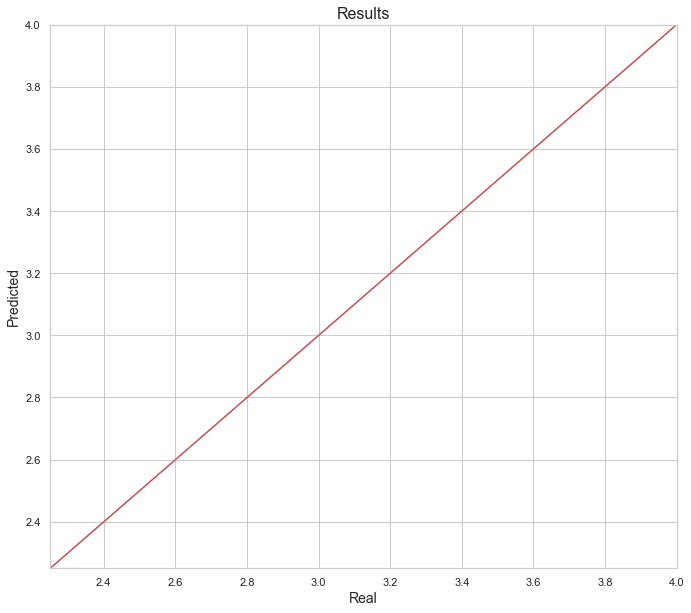

In [59]:
plt.figure(figsize=(10,10))
x=np.linspace(0,5,5)
plt.plot(svr_results['y_test'], svr_results['y_pred'], 'b.')
plt.plot(x, x, 'r-')
plt.xlim(2.25,4)
plt.ylim(2.25,4)
plt.title("Results", fontsize=16)
plt.xlabel("Real", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.savefig("Results.png")
plt.show()